In [82]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 
# Za prikaz grafov neposredno v Jupyter Notebook

1. KONSTRUKCIJA GRAFA

Generiranje grafa

In [83]:
#generiranje grafa
def generate_5_0_graph(k):
    """
    Ustvari graf tipa (5,0) s k-orbitami.
    Vsaka orbita vsebuje 10 oglišč, graf pa vključuje cilindrični del in petkotne zaključke.
    """
    G = nx.Graph()  # Ustvari prazen graf
    n = 10 * k  # Skupno število oglišč

    # Dodaj vsa oglišča
    for i in range(n):
        G.add_node(i)

    # Dodaj povezave za cilindrični del
    for orbit in range(k):
        base = orbit * 10
        for i in range(10):
            # Poveži oglišča v obroču (šestkotna struktura)
            G.add_edge(base + i, base + (i + 1) % 10)

            # Poveži z naslednjo orbito
            if orbit < k - 1:
                G.add_edge(base + i, base + 10 + (i + 1) % 10)

    # Dodaj petkotne zaključke
    # Prvih 5 oglišč prve orbite poveži v petkotnik
    for i in range(5):
        G.add_edge(i, (i + 1) % 5)

    # Zadnjih 5 oglišč zadnje orbite poveži v petkotnik
    for i in range(5):
        G.add_edge(n - 5 + i, n - 5 + (i + 1) % 5)

    return G

Risanje grafa

In [84]:
#Risanje grafa
def plot_graph(G, title="Graf"):
    """
    Nariši graf z uporabo matplotlib in knjižnice networkx.
    """
    pos = nx.spring_layout(G)  # Razporeditev vozlišč za boljšo vizualizacijo
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    plt.title(title)
    plt.show()

Generiranje in risanje grafov za k = 3 in k = 4

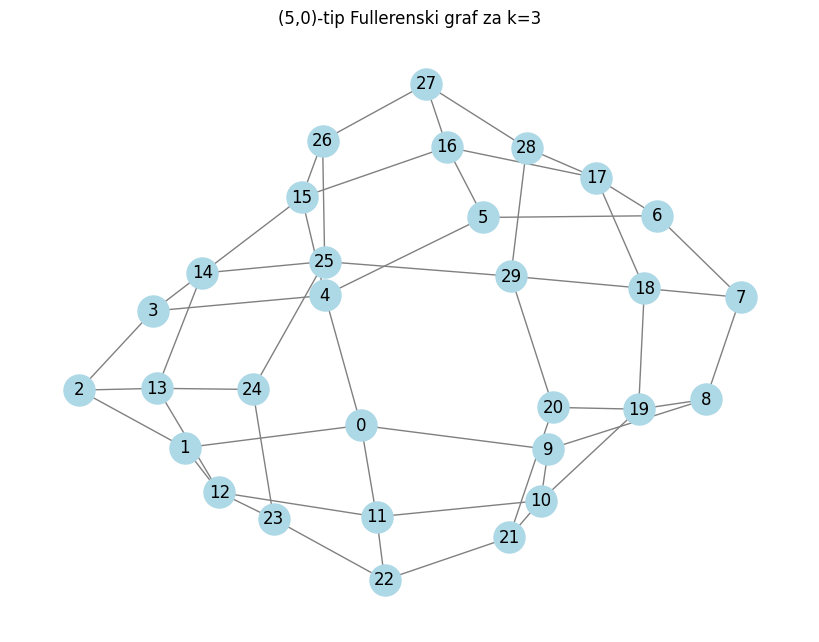

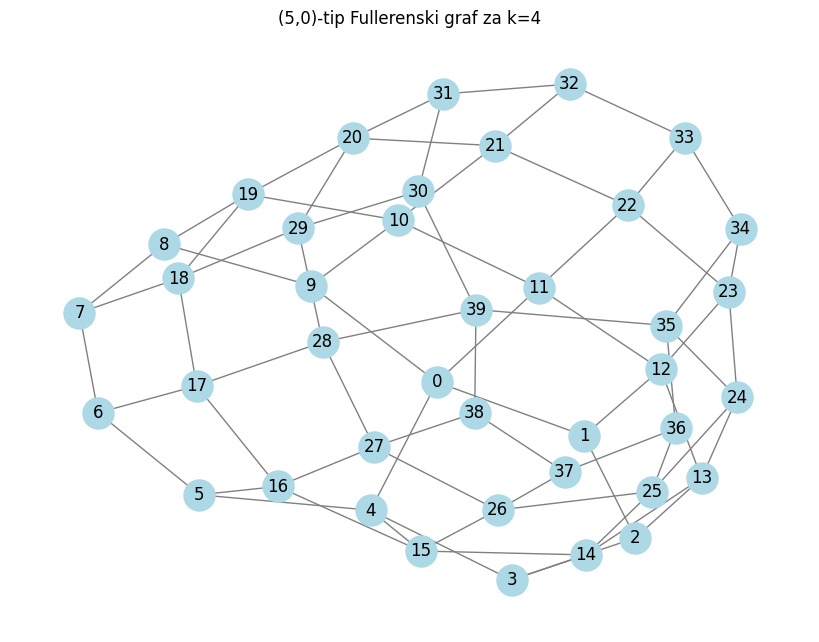

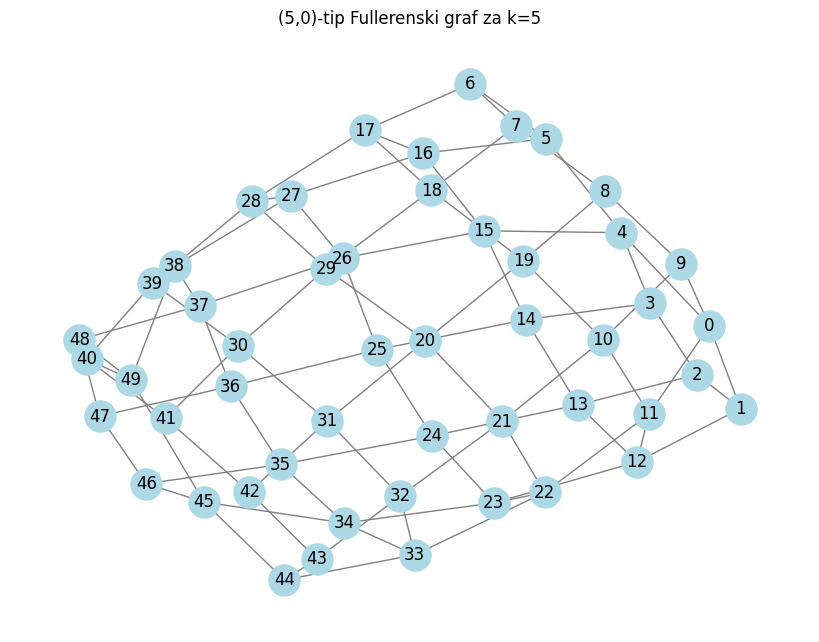

In [85]:
# Ustvari in nariši grafe za različne vrednosti k
k_vrednosti = [3, 4, 5]  # Določi število orbit
for k in k_vrednosti:
    G = generate_5_0_graph(k)  # Ustvari graf za dano k
    plot_graph(G, title=f"(5,0)-tip Fullerenski graf za k={k}")  # Nariši graf

Preverjanje kode

In [86]:
# Preverjanje osnovnih lastnosti grafa
print(f"Število oglišč: {G.number_of_nodes()}")
print(f"Število povezav: {G.number_of_edges()}")
print(f"Ali je graf povezan? {nx.is_connected(G)}")

Število oglišč: 50
Število povezav: 92
Ali je graf povezan? True


In [87]:
# Preveri krožno strukturo v vsaki orbiti
k = 3  # Vrednost k, ki si jo želiš preveriti
for orbit in range(k):
    base = orbit * 10
    print(f"Orbita {orbit}: Oglišča {list(range(base, base + 10))}")
    # Preveri krožne povezave
    for i in range(10):
        u, v = base + i, base + (i + 1) % 10
        if not G.has_edge(u, v):
            print(f"Povezava manjkajoča: {u}-{v}")




Orbita 0: Oglišča [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Orbita 1: Oglišča [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Orbita 2: Oglišča [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


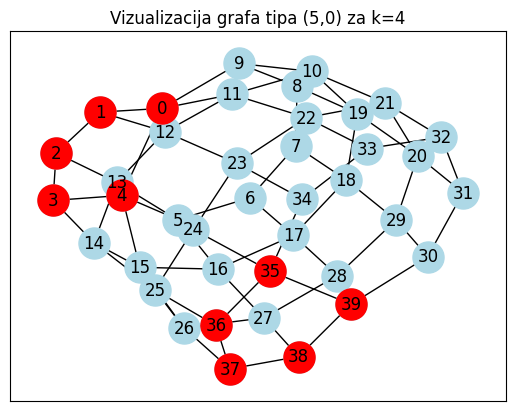

In [105]:
def draw_colored_graph(G, k):
    """
    Nariše graf z označenimi začetnimi in končnimi vozlišči v rdeči barvi.
    """
    pos = nx.spring_layout(G)  # Postavitev grafa
    
    # Vsa vozlišča pobarvamo modro
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
    nx.draw_networkx_edges(G, pos, edge_color="black")
    nx.draw_networkx_labels(G, pos, font_color="black")
    
    # Pobarvamo začetna vozlišča (prvi petkotnik) v rdečo
    first_pentagon = list(range(5))
    nx.draw_networkx_nodes(G, pos, nodelist=first_pentagon, node_color="red", node_size=500)
    
    # Pobarvamo končna vozlišča (zadnji petkotnik) v rdečo
    last_pentagon = list(range(10 * k - 5, 10 * k))
    nx.draw_networkx_nodes(G, pos, nodelist=last_pentagon, node_color="red", node_size=500)
    
    plt.title(f"Vizualizacija grafa tipa (5,0) za k={k}")
    plt.show()

# Testiraj s k=4
k = 4
G = generate_5_0_graph(k)
draw_colored_graph(G, k)

2. IZRAČUN RAZDALJ

In [106]:
def calculate_distance_vector(G, u):
    """
    Izračuna vektor razdalj za dano vozlišče u v grafu G.
    """
    distances = nx.single_source_shortest_path_length(G, u)  # Razdalje od u do vseh drugih vozlišč
    max_distance = max(distances.values())  # Najdaljša razdalja
    distance_vector = [0] * (max_distance + 1)  # Inicializiraj vektor z 0

    # Preštej število vozlišč na vsaki razdalji
    for dist in distances.values():
        distance_vector[dist] += 1

    return distance_vector

In [107]:
# razdelimo graf na orbite in izračunamo vektor razdalj za prvo vozlišče vsake orbite
def analyze_orbits(G, k):
    """
    Analizira razdalje za eno vozlišče iz vsake orbite.
    """
    n = 10 * k  # Skupno število vozlišč
    orbits = [list(range(i * 10, (i + 1) * 10)) for i in range(k)]  # Seznam orbit
    results = {}

    for i, orbit in enumerate(orbits):
        u = orbit[0]  # Izberi prvo vozlišče iz orbite
        distance_vector = calculate_distance_vector(G, u)
        results[f"Orbita {i}"] = {
            "Vozlišče": u,
            "Vektor razdalj": distance_vector
        }
        print(f"Orbita {i}: Vozlišče {u}, Vektor razdalj: {distance_vector}")

    return results

In [108]:
k = 3  # Število orbit
G = generate_5_0_graph(k)

# Analiza orbit in razdalj
results = analyze_orbits(G, k)


Orbita 0: Vozlišče 0, Vektor razdalj: [1, 4, 8, 9, 6, 2]
Orbita 1: Vozlišče 10, Vektor razdalj: [1, 4, 6, 7, 10, 2]
Orbita 2: Vozlišče 20, Vektor razdalj: [1, 3, 6, 9, 7, 4]


Opomba: Simetrija grafa zagotavlja, da imajo vsa vozlišča znotraj iste orbite enak vektor razdalj.

In [109]:
def check_graph_structure(G, k):
    """
    Preveri, ali so vse povezave med orbitami in znotraj njih pravilno dodane.
    """
    n = 10 * k  # Skupno število vozlišč
    orbits = [list(range(i * 10, (i + 1) * 10)) for i in range(k)]  # Seznam orbit

    # Preveri cilindrični del
    for i in range(k - 1):  # Za vsako sosednjo orbito
        for j in range(10):
            u, v = orbits[i][j], orbits[i + 1][(j + 1) % 10]
            if not G.has_edge(u, v):
                print(f"Manjka povezava med orbito {i} in orbito {i+1}: {u}-{v}")
                return False

    # Preveri povezave v cilindrični orbiti
    for i in range(k):
        for j in range(10):
            u, v = orbits[i][j], orbits[i][(j + 1) % 10]
            if not G.has_edge(u, v):
                print(f"Manjka povezava znotraj orbite {i}: {u}-{v}")
                return False

    # Preveri petkotne zaključke
    for i in range(5):
        # Prvi petkotnik
        u, v = i, (i + 1) % 5
        if not G.has_edge(u, v):
            print(f"Manjka povezava v prvem petkotniku: {u}-{v}")
            return False

        # Zadnji petkotnik
        u, v = n - 5 + i, n - 5 + (i + 1) % 5
        if not G.has_edge(u, v):
            print(f"Manjka povezava v zadnjem petkotniku: {u}-{v}")
            return False

    print("Struktura grafa je pravilna!")
    return True




In [110]:
def calculate_distance_vector(G, u):
    """
    Izračuna vektor razdalj za dano vozlišče u.
    """
    distances = nx.shortest_path_length(G, source=u)  # Najkrajše poti od u
    max_distance = max(distances.values())  # Največja razdalja v grafu
    distance_vector = [0] * (max_distance + 1)

    for v in distances:
        distance_vector[distances[v]] += 1  # Štej oglišča na vsaki razdalji

    return distance_vector




In [111]:
def diagnose_graph(G, k):
    """
    Celovita diagnostika grafa:
    - Preveri strukturo grafa.
    - Preveri simetrijo orbit.
    """
    if not check_graph_structure(G, k):
        print("Napaka: Struktura grafa ni pravilna!")
        return False

    orbits = [list(range(i * 10, (i + 1) * 10)) for i in range(k)]
    reference_vector = calculate_distance_vector(G, orbits[0][0])  # Vektor razdalj za prvo orbito

    for i, orbit in enumerate(orbits):
        for u in orbit:
            if calculate_distance_vector(G, u) != reference_vector:
                print(f"Napaka: Simetrija grafa ni pravilna! Vozlišče {u} v orbiti {i} ima drugačen vektor razdalj.")
                return False

    print("Graf je pravilen: Struktura in simetrija sta potrjeni!")
    return True


